# AIDM7350: AI and Digital Media Workshop Group Project Code

# Group Information:
Yihui SONG : 22422382

Haoyang TANG : 22434739

Liang HUANG : 22465693

# Load the dataset

In [ ]:
# Install NetworkX, Matplotlib, Pandas, Numpy using pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.preprocessing import OneHotEncoder
import time
from sklearn import metrics

# Set visualization style
sns.set_style('whitegrid')

In [ ]:
from google.colab import drive
drivePath = '/content/drive' #please do not change
drive.mount(drivePath)

Mounted at /content/drive


In [ ]:
# Install the library on your environment
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9676 sha256=27d89acb433443c82aacd95de93cfe8ea030e2c2024987958b4f4d43b8aad8f8
  Stored in directory: /root/.cache/pip/wheels/04/5f/3e/46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built wget


In [ ]:
# Import the library
import wget
import os, pathlib

# Setup URL and path variables
URL = 'https://raw.githubusercontent.com/evelynnsong/AIDM/main/BankChurners.csv'
doc = 'BankChurners.csv'


dataPath = drivePath + '/MyDrive/Colab Notebooks/data'

#Create path if not exists
if not(os.path.exists(dataPath)):
  path = pathlib.Path(dataPath)
  path.mkdir(parents=True, exist_ok=True)
else:
  print('The data path you selected already exists')

# Download the file
fileName = wget.download(URL, out=dataPath)

# Print the file name including the local path
print(fileName)

The data path you selected already exists
/content/drive/MyDrive/Colab Notebooks/data/BankChurners (1).csv


# Data Visualization

Firstly, take a quick glance at the raw data.

In [ ]:
churn = pd.read_csv(fileName)
churn.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [ ]:
churn = churn.drop(columns=['CLIENTNUM','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])

In [ ]:
churncopy = churn.copy()

Later, we will master some characteristics of data through data visualization.

In [ ]:
Attrition = churn['Attrition_Flag'].value_counts()
Attrition

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

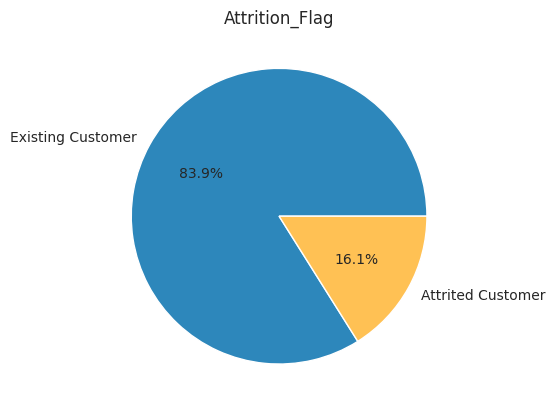

In [ ]:
label = 'Existing Customer','Attrited Customer'
colors = ['#2D87BB','#FFC154']
plt.pie(Attrition, labels=label, autopct='%1.1f%%', colors=colors)
plt.title('Attrition_Flag')
plt.show()

<ipython-input-14-84f58f953eba>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=churn, x='Customer_Age', hue='Attrition_Flag', shade=True, alpha=0.8,palette=sns.color_palette(colors))


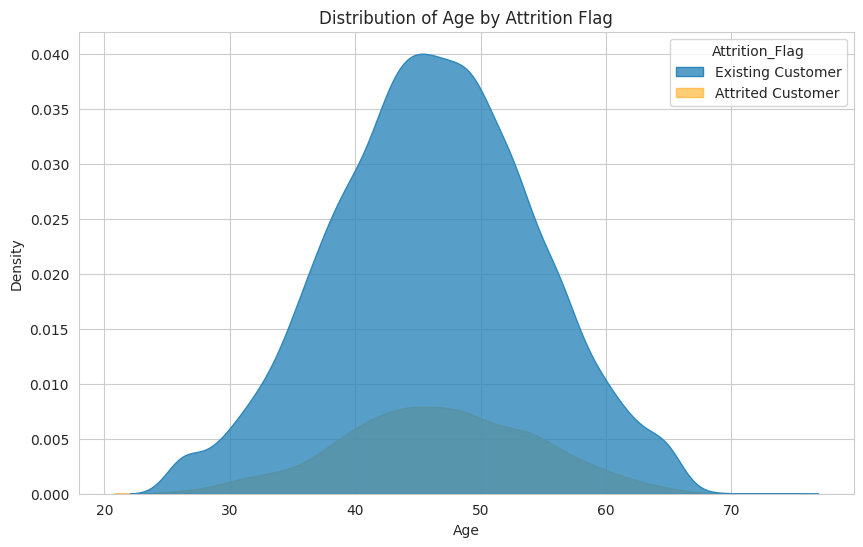

In [ ]:
# Plot distribution of age by attrition flag
plt.figure(figsize=(10,6))
colors = ['#2D87BB','#FFC154']
sns.kdeplot(data=churn, x='Customer_Age', hue='Attrition_Flag', shade=True, alpha=0.8,palette=sns.color_palette(colors))
plt.title('Distribution of Age by Attrition Flag')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

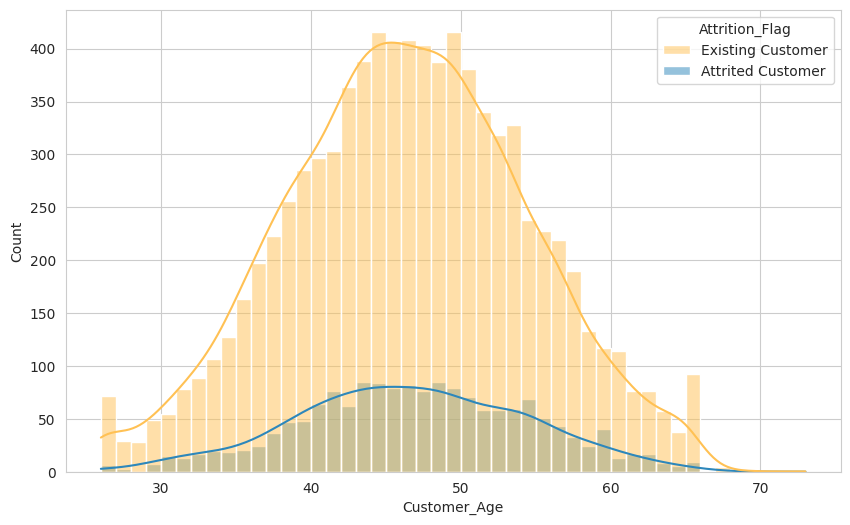

In [ ]:
plt.figure(figsize=(10,6))
colors = ['#FFC154','#2D87BB']
sns.histplot(x='Customer_Age', data=churn, kde=True, hue='Attrition_Flag',palette=sns.color_palette(colors))
 
plt.show()

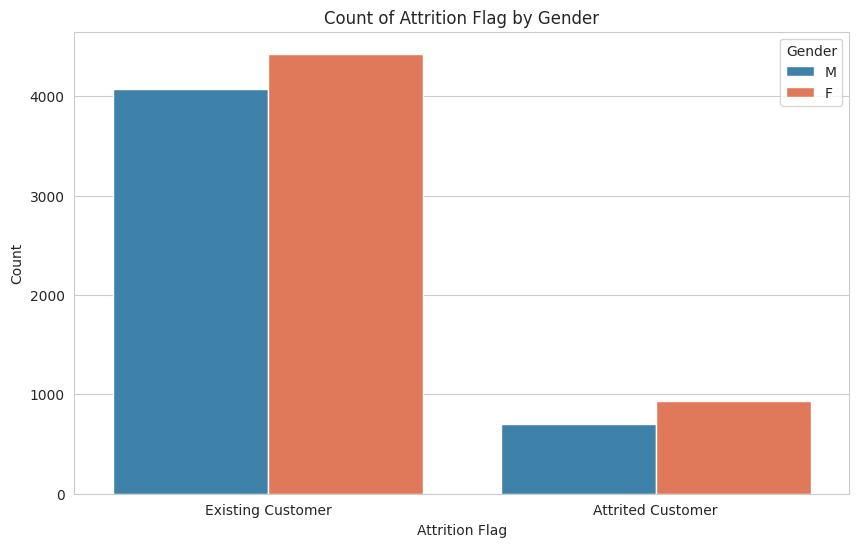

In [ ]:
# Plot count of attrition flag by gender
plt.figure(figsize=(10,6))
flatui = ['#2D87BB','#F66D44']
sns.countplot(data=churn, x='Attrition_Flag', hue='Gender', palette= sns.color_palette(flatui) )
plt.title('Count of Attrition Flag by Gender')
plt.xlabel('Attrition Flag')
plt.ylabel('Count')
plt.show()

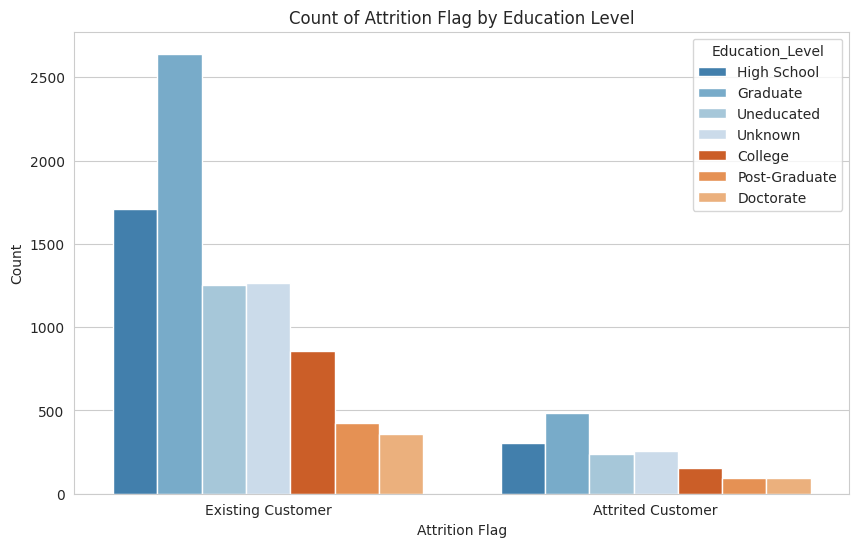

In [ ]:
# Plot count of attrition flag by education level
plt.figure(figsize=(10,6))
sns.countplot(data=churn, x='Attrition_Flag', hue='Education_Level',palette= sns.color_palette("tab20c"))
plt.title('Count of Attrition Flag by Education Level')
plt.xlabel('Attrition Flag')
plt.ylabel('Count')
plt.show()

<ipython-input-65-04a256de9b41>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0, 0].set_yticklabels(['{:.0%}'.format(x) for x in axs[0, 0].get_yticks()])
<ipython-input-65-04a256de9b41>:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0, 1].set_yticklabels(['{:.0%}'.format(x) for x in axs[0, 1].get_yticks()])
<ipython-input-65-04a256de9b41>:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0, 2].set_yticklabels(['{:.0%}'.format(x) for x in axs[0, 2].get_yticks()])
<ipython-input-65-04a256de9b41>:62: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1, 0].set_yticklabels(['{:.0%}'.format(x) for x in axs[1, 0].get_yticks()])
<ipython-input-65-04a256de9b41>:75: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1, 1].set_yticklabels(['{:.0%}'.format(x) for x in axs[1, 1].get_yticks()])
<ipython-input-65-04a256de9b41>:90:

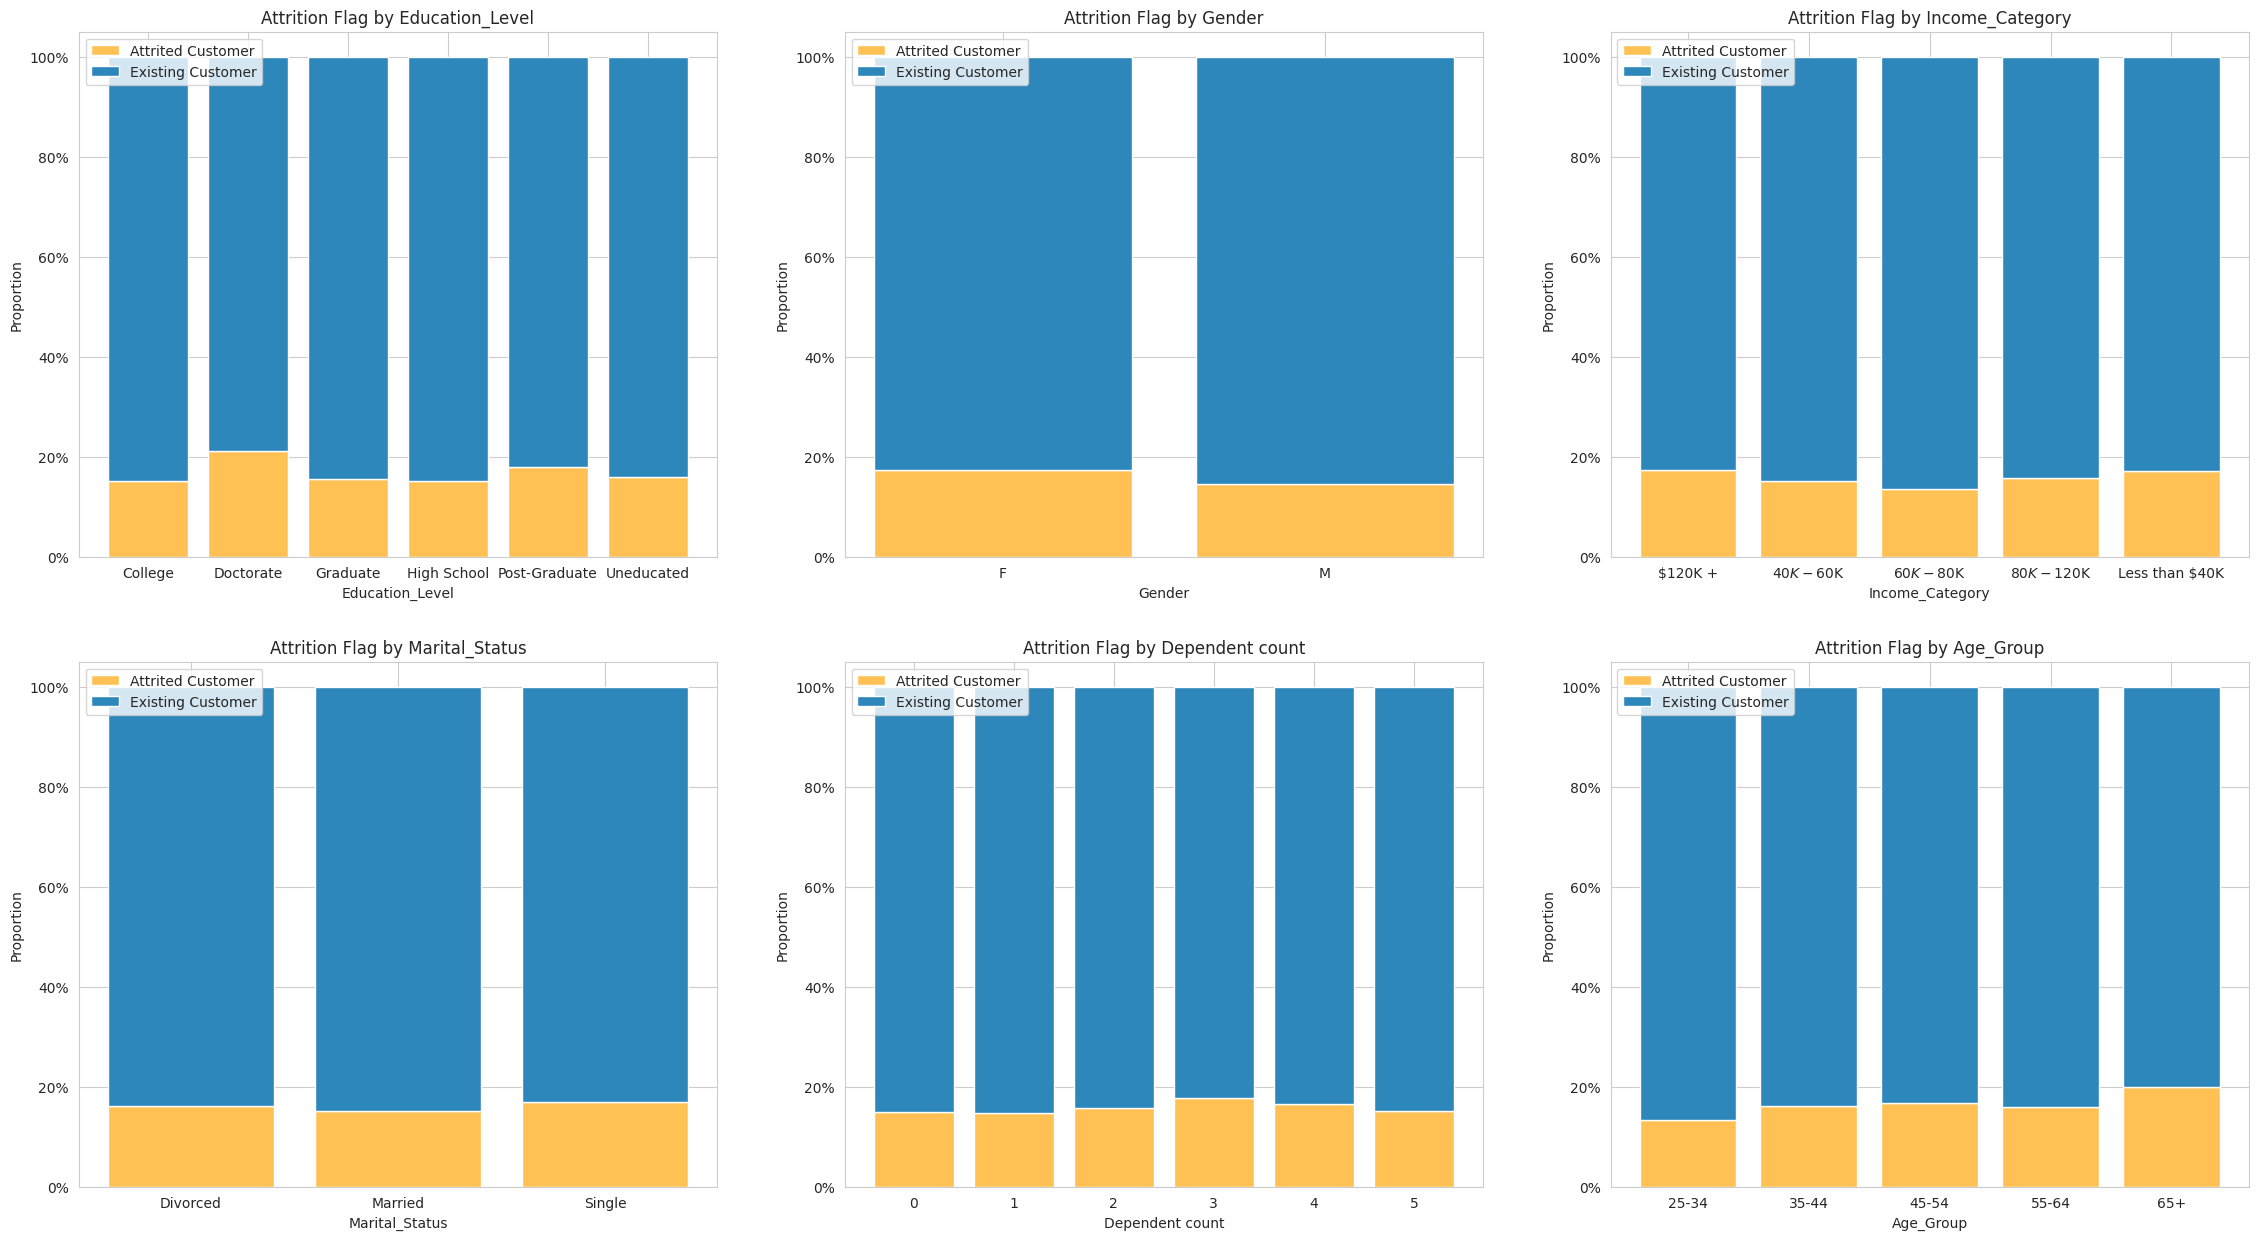

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter out rows with unknown gender
df1 = churn[churn['Education_Level'] != 'Unknown']
df2 = churn[churn['Gender'] != 'Unknown']
df3 = churn[churn['Income_Category'] != 'Unknown']
df4 = churn[churn['Marital_Status'] != 'Unknown']

# Create subplots with 2 rows and 3 columns
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(28, 15))

# Create a groupby object by Education_Level and attrition flag
grouped1 = df1.groupby(['Education_Level', 'Attrition_Flag'])['Attrition_Flag'].count().unstack()
gender_total1 = grouped1.sum(axis=1)
proportion1 = grouped1.divide(gender_total1, axis=0)
axs[0, 0].bar(proportion1.index, proportion1['Attrited Customer'], label='Attrited Customer', color='#FFC154')
axs[0, 0].bar(proportion1.index, proportion1['Existing Customer'], 
bottom=proportion1['Attrited Customer'], label='Existing Customer', color='#2D87BB')
axs[0, 0].set_title('Attrition Flag by Education_Level')
axs[0, 0].set_xlabel('Education_Level')
axs[0, 0].set_ylabel('Proportion')
axs[0, 0].set_yticklabels(['{:.0%}'.format(x) for x in axs[0, 0].get_yticks()])
axs[0, 0].legend(loc='upper left')

# Create a groupby object by Gender and attrition flag
grouped2 = df2.groupby(['Gender', 'Attrition_Flag'])['Attrition_Flag'].count().unstack()
Gender_total = grouped2.sum(axis=1)
proportion2 = grouped2.divide(Gender_total, axis=0)
axs[0, 1].bar(proportion2.index, proportion2['Attrited Customer'], label='Attrited Customer', color='#FFC154')
axs[0, 1].bar(proportion2.index, proportion2['Existing Customer'], 
bottom=proportion2['Attrited Customer'], label='Existing Customer', color='#2D87BB')
axs[0, 1].set_title('Attrition Flag by Gender')
axs[0, 1].set_xlabel('Gender')
axs[0, 1].set_ylabel('Proportion')
axs[0, 1].set_yticklabels(['{:.0%}'.format(x) for x in axs[0, 1].get_yticks()])
axs[0, 1].legend(loc='upper left')

# Create a groupby object by Income_Category and attrition flag
grouped3 = df3.groupby(['Income_Category', 'Attrition_Flag'])['Attrition_Flag'].count().unstack()
Income_Category_total = grouped3.sum(axis=1)
proportion3 = grouped3.divide(Income_Category_total, axis=0)
axs[0, 2].bar(proportion3.index, proportion3['Attrited Customer'], label='Attrited Customer', color='#FFC154')
axs[0, 2].bar(proportion3.index, proportion3['Existing Customer'], 
bottom=proportion3['Attrited Customer'], label='Existing Customer', color='#2D87BB')
axs[0, 2].set_title('Attrition Flag by Income_Category')
axs[0, 2].set_xlabel('Income_Category')
axs[0, 2].set_ylabel('Proportion')
axs[0, 2].set_yticklabels(['{:.0%}'.format(x) for x in axs[0, 2].get_yticks()])
axs[0, 2].legend(loc='upper left')

# Create a groupby object by Marital_Status and attrition flag
grouped4 = df4.groupby(['Marital_Status', 'Attrition_Flag'])['Attrition_Flag'].count().unstack()
Marital_Status_total = grouped4.sum(axis=1)
proportion4 = grouped4.divide(Marital_Status_total, axis=0)
axs[1, 0].bar(proportion4.index, proportion4['Attrited Customer'], label='Attrited Customer', color='#FFC154')
axs[1, 0].bar(proportion4.index, proportion4['Existing Customer'], 
bottom=proportion4['Attrited Customer'], label='Existing Customer', color='#2D87BB')
axs[1, 0].set_title('Attrition Flag by Marital_Status')
axs[1, 0].set_xlabel('Marital_Status')
axs[1, 0].set_ylabel('Proportion')
axs[1, 0].set_yticklabels(['{:.0%}'.format(x) for x in axs[1, 0].get_yticks()])
axs[1, 0].legend(loc='upper left')

# Create a groupby object by Card_Category and attrition flag
grouped5 = churn.groupby(['Dependent_count', 'Attrition_Flag'])['Attrition_Flag'].count().unstack()
Card_Category_total = grouped5.sum(axis=1)
proportion5 = grouped5.divide(Card_Category_total, axis=0)
axs[1, 1].bar(proportion5.index, proportion5['Attrited Customer'], label='Attrited Customer', color='#FFC154')
axs[1, 1].bar(proportion5.index, proportion5['Existing Customer'], 
bottom=proportion5['Attrited Customer'], label='Existing Customer', color='#2D87BB')
axs[1, 1].set_title('Attrition Flag by Dependent count')
axs[1, 1].set_xlabel('Dependent count')
axs[1, 1].set_ylabel('Proportion')
axs[1, 1].set_yticklabels(['{:.0%}'.format(x) for x in axs[1, 1].get_yticks()])
axs[1, 1].legend(loc='upper left')

# Create a groupby object by Age_Group and attrition flag
churn['Age_Group'] = pd.cut(churn['Customer_Age'], bins=[25, 35, 45, 55, 65, 75], 
labels=['25-34', '35-44', '45-54', '55-64', '65+'])
grouped6 = churn.groupby(['Age_Group', 'Attrition_Flag'])['Attrition_Flag'].count().unstack()
Age_Group_total = grouped6.sum(axis=1)
proportion6 = grouped6.divide(Age_Group_total, axis=0)
axs[1, 2].bar(proportion6.index, proportion6['Attrited Customer'], label='Attrited Customer', color='#FFC154')
axs[1, 2].bar(proportion6.index, proportion6['Existing Customer'], 
bottom=proportion6['Attrited Customer'], label='Existing Customer', color='#2D87BB')
axs[1, 2].set_title('Attrition Flag by Age_Group')
axs[1, 2].set_xlabel('Age_Group')
axs[1, 2].set_ylabel('Proportion')
axs[1, 2].set_yticklabels(['{:.0%}'.format(x) for x in axs[1, 2].get_yticks()])
axs[1, 2].legend(loc='upper left')

plt.show()



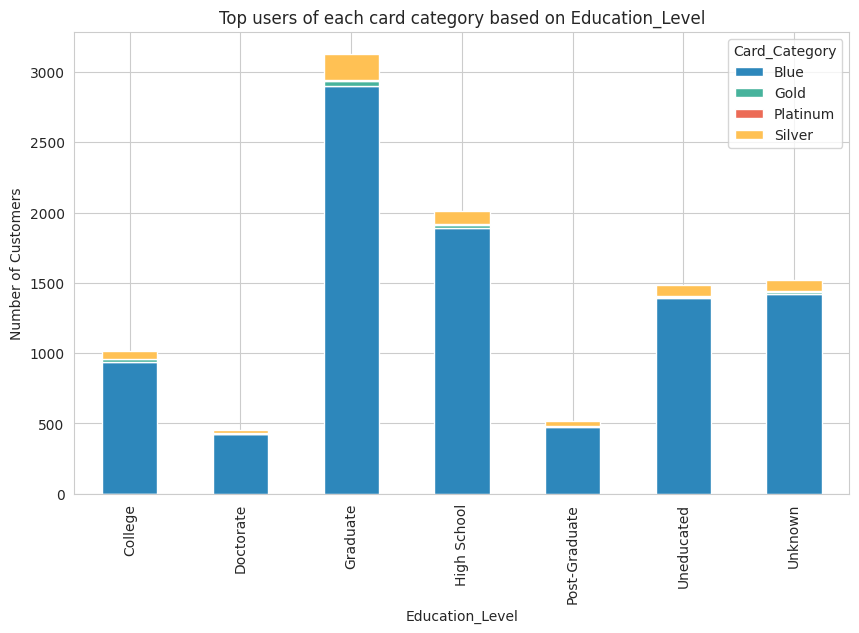

In [ ]:
# group the data by Card_Category and Education_Level and calculate the count of customers in each group
grouped = churn.groupby(['Card_Category', 'Education_Level']).size().reset_index(name='counts')

# pivot the data to have the counts as values, Card_Category as columns, and Education_Level as index
pivot = grouped.pivot(index='Education_Level', columns='Card_Category', values='counts')
colors = ['#2D87BB','#47B39C','#EC6B56','#FFC154']
pivot.plot(kind='bar', stacked=True, figsize=(10,6), color = colors)
plt.title('Top users of each card category based on Education_Level')
plt.xlabel('Education_Level')
plt.ylabel('Number of Customers')
plt.show()

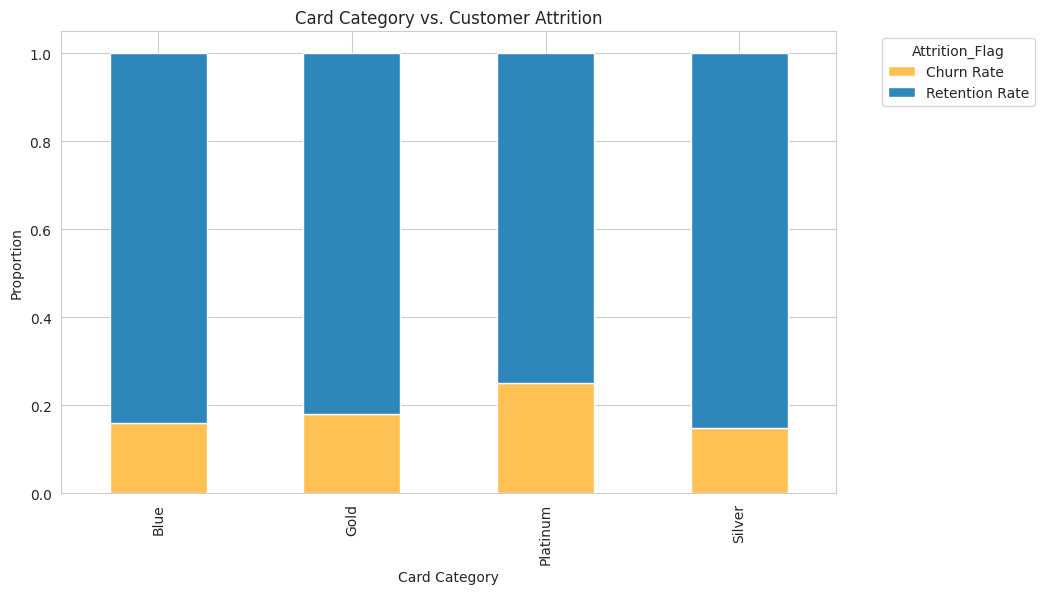

In [ ]:
# group Card Category and Attrition Flag
group5 = churn.groupby(["Card_Category", "Attrition_Flag"]).size().unstack(fill_value=0)

# Calculate the percentage of customer retention and churn
group5["Retention Rate"] = group5["Existing Customer"] / (group5["Existing Customer"] + group5["Attrited Customer"])
group5["Churn Rate"] = group5["Attrited Customer"] / (group5["Existing Customer"] + group5["Attrited Customer"])

# Drawing Stacked Bars
colors = ['#FFC154','#2D87BB']
ax = group5[["Churn Rate","Retention Rate"]].plot(kind="bar", stacked=True, figsize=(10, 6),color=colors)
ax.set_xlabel("Card Category")
ax.set_ylabel("Proportion")
ax.set_title("Card Category vs. Customer Attrition")
plt.legend(title="Attrition_Flag", bbox_to_anchor=(1.05, 1), loc='upper left')

In [ ]:
churn

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Age_Group
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,35-44
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,45-54
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,45-54
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,35-44
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,35-44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,...,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,45-54
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,...,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,35-44
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,...,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,35-44
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,...,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,25-34


In [ ]:
# fix feature name
new_churn = churn.rename(columns={
    'Dependent_count': 'Dependent_Count',
    'Months_on_book': 'Months_on_Book'
})

new_churn.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_Count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_Book,Total_Relationship_Count,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Age_Group
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,35-44
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,45-54
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,45-54
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,35-44
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,35-44


<ipython-input-22-015b4e090832>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(new_churn.corr(), annot=True, cmap='YlGnBu')


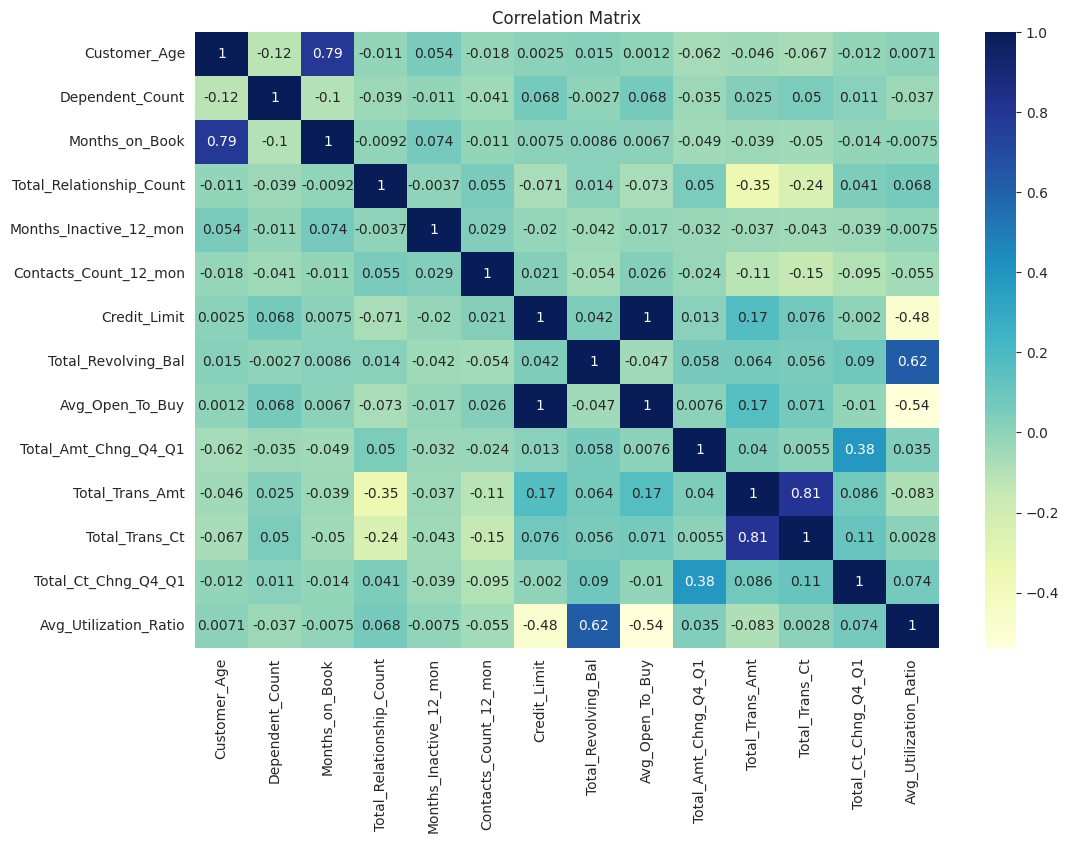

In [ ]:
# Plot correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(new_churn.corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation Matrix')
plt.show()

<Axes: xlabel='Total_Trans_Amt', ylabel='Total_Trans_Ct'>

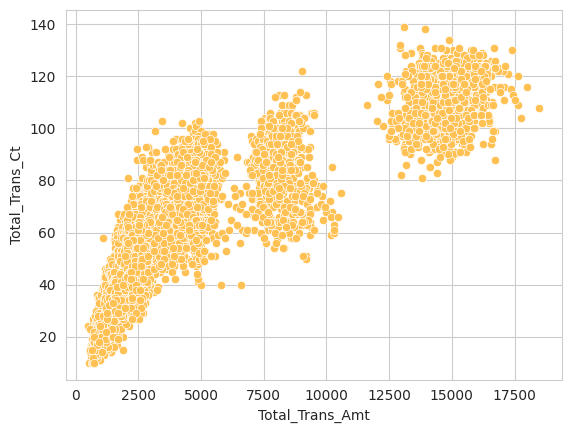

In [ ]:
sns.scatterplot(x='Total_Trans_Amt', y='Total_Trans_Ct', data=new_churn, c='#FFC154')

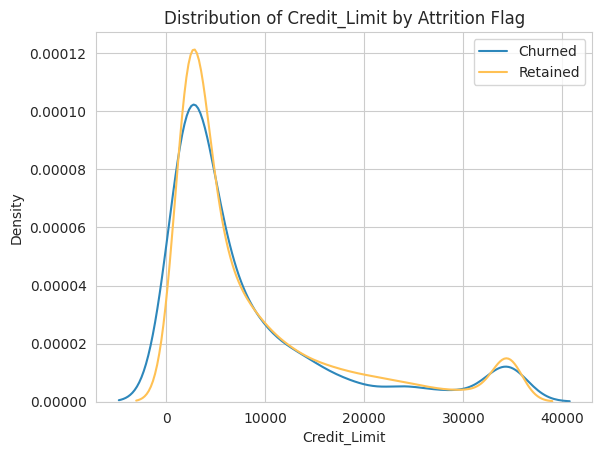

In [ ]:

# Filter out rows with unknown gender
df = churn[churn['Gender'] != 'Unknown']

# Create a KDE plot to compare the distribution of Credit_Limit for churned vs. retained customers
sns.kdeplot(df.loc[df['Attrition_Flag'] == 'Attrited Customer', 'Credit_Limit'], label='Churned', color='#2D87BB')
sns.kdeplot(df.loc[df['Attrition_Flag'] == 'Existing Customer', 'Credit_Limit'], label='Retained',color='#FFC154' )

# Add labels and title
plt.title('Distribution of Credit_Limit by Attrition Flag')
plt.xlabel('Credit_Limit')
plt.ylabel('Density')

# Add legend
plt.legend()

# Show the plot
plt.show()


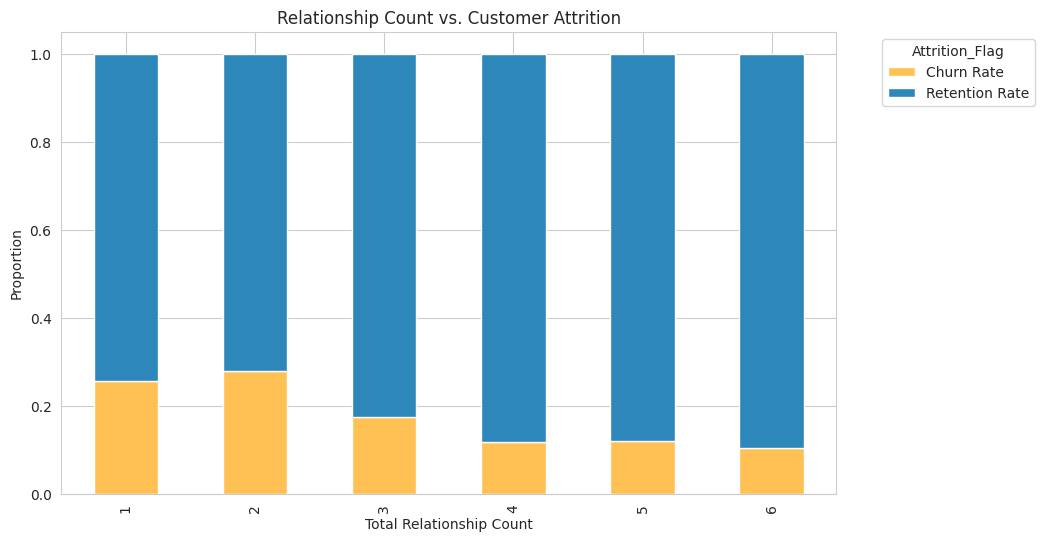

In [ ]:
# group Relationship Count and Attrition Flag
grouped = churn.groupby(["Total_Relationship_Count", "Attrition_Flag"]).size().unstack(fill_value=0)

# Calculate the percentage of customer retention and churn
grouped["Retention Rate"] = grouped["Existing Customer"] / (grouped["Existing Customer"] + grouped["Attrited Customer"])
grouped["Churn Rate"] = grouped["Attrited Customer"] / (grouped["Existing Customer"] + grouped["Attrited Customer"])

# Drawing Stacked Bars
colors = ['#FFC154','#2D87BB']
ax = grouped[["Churn Rate","Retention Rate"]].plot(kind="bar", stacked=True, figsize=(10, 6),color=colors)
ax.set_xlabel("Total Relationship Count")
ax.set_ylabel("Proportion")
ax.set_title("Relationship Count vs. Customer Attrition")
plt.legend(title="Attrition_Flag", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# From the graph, it can be seen that as Total_Relationship_Count increases,
#  the percentage of retained customers gradually increases, while the percentage of lost customers gradually decreases.
# This indicates that building more relationships increases customer loyalty and decreases customer churn.
# The stacked bar chart format can more clearly show the proportion of each type of customers at different Total_Relationship_Count,
#  which helps us better understand the trend of customer churn and retention.

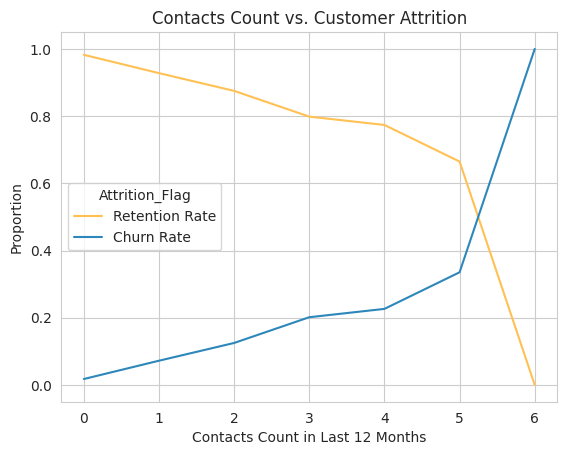

In [ ]:
# Calculate the percentage of customer retention and churn
grouped = churn.groupby(["Contacts_Count_12_mon", "Attrition_Flag"]).size().unstack(fill_value=0)
grouped["Retention Rate"] = grouped["Existing Customer"] / (grouped["Existing Customer"] + grouped["Attrited Customer"])
grouped["Churn Rate"] = grouped["Attrited Customer"] / (grouped["Existing Customer"] + grouped["Attrited Customer"])

# Draw line plot
sns.lineplot(data=grouped, x="Contacts_Count_12_mon", y="Retention Rate", label="Retention Rate",color='#FFC154')
sns.lineplot(data=grouped, x="Contacts_Count_12_mon", y="Churn Rate", label="Churn Rate",color='#2D87BB')
plt.title("Contacts Count vs. Customer Attrition")
plt.xlabel("Contacts Count in Last 12 Months")
plt.ylabel("Proportion")
plt.legend(title="Attrition_Flag")
plt.show()

#It was concluded that as the number of customer contacts increased over the past 12 months,
# their retention rate decreased and their churn rate increased. 
# This may indicate that frequent contact may be annoying to customers, which leads to their churn.

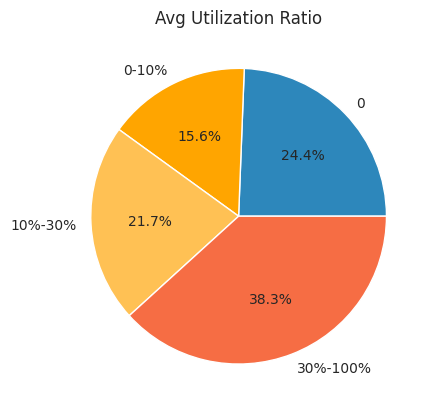

In [ ]:
group1 = churn['Avg_Utilization_Ratio'].value_counts()[0]

group2 = (churn['Avg_Utilization_Ratio'].gt(0) & churn['Avg_Utilization_Ratio'].lt(0.101)).sum()

group3 = (churn['Avg_Utilization_Ratio'].gt(0.100) & churn['Avg_Utilization_Ratio'].lt(0.301)).sum()

group4 = (churn['Avg_Utilization_Ratio'].gt(0.300) & churn['Avg_Utilization_Ratio'].lt(1)).sum()

cur_count = [group1,group2,group3,group4]
labels = ["0", "0-10%", "10%-30%", "30%-100%"]
colors = ['#2D87BB','#ffa500','#FFC154','#F66D44']
plt.pie(cur_count, labels=labels, autopct='%1.1f%%', colors=colors)
plt.title('Avg Utilization Ratio')
plt.show()

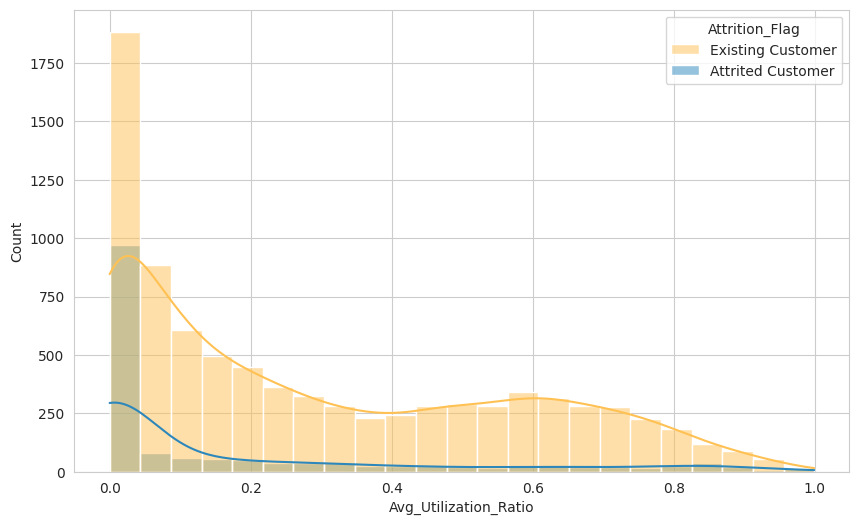

In [ ]:
plt.figure(figsize=(10,6))
colors = ['#FFC154','#2D87BB']
sns.histplot(x='Avg_Utilization_Ratio', data=churn, kde=True, hue='Attrition_Flag',palette=sns.color_palette(colors))
 
plt.show()

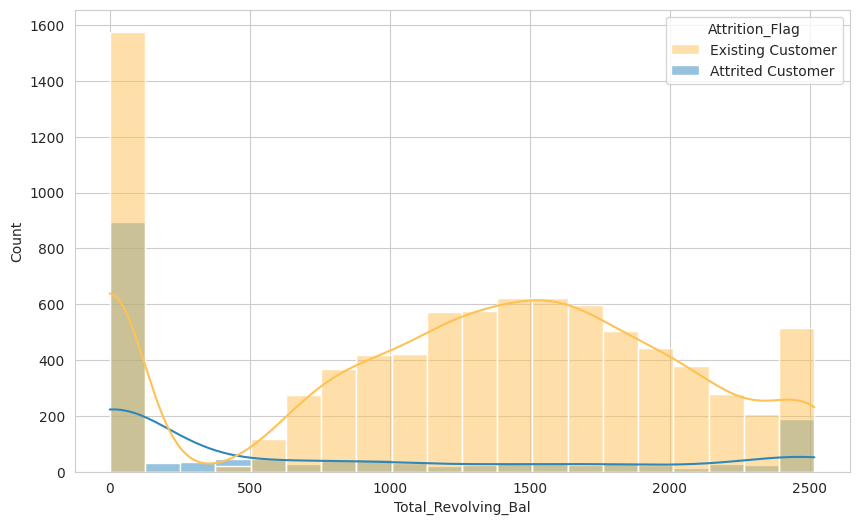

In [ ]:
plt.figure(figsize=(10,6))
colors = ['#FFC154','#2D87BB']
sns.histplot(x='Total_Revolving_Bal', data=churn, kde=True, hue='Attrition_Flag',palette=sns.color_palette(colors))
 
plt.show()

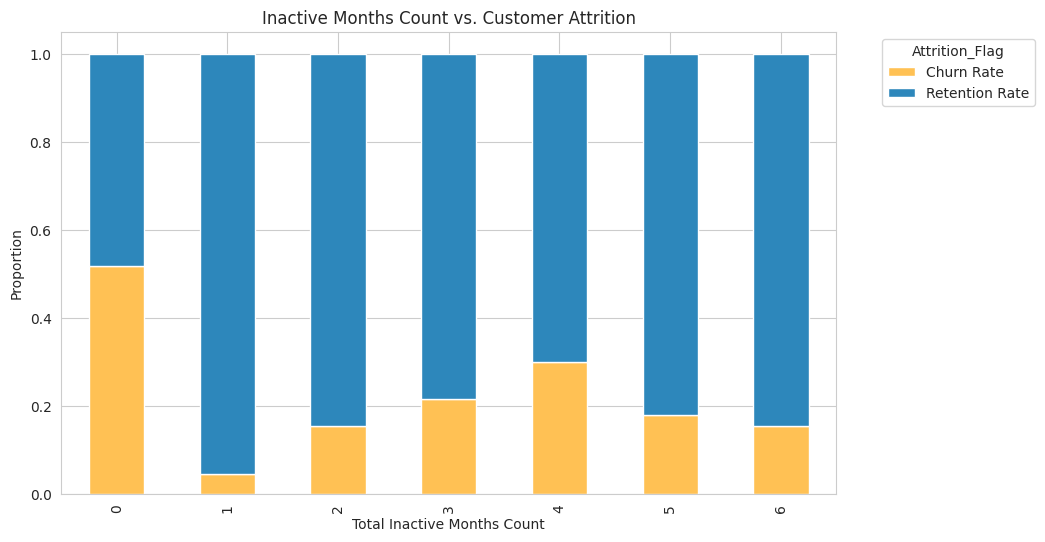

In [ ]:
# group Total Inactive Months Count and Attrition Flag
grouped = churn.groupby(["Months_Inactive_12_mon", "Attrition_Flag"]).size().unstack(fill_value=0)

# Calculate the percentage of customer retention and churn
grouped["Retention Rate"] = grouped["Existing Customer"] / (grouped["Existing Customer"] + grouped["Attrited Customer"])
grouped["Churn Rate"] = grouped["Attrited Customer"] / (grouped["Existing Customer"] + grouped["Attrited Customer"])

# Drawing Stacked Bars
colors = ['#FFC154','#2D87BB']
ax = grouped[["Churn Rate","Retention Rate"]].plot(kind="bar", stacked=True, figsize=(10, 6),color=colors)
ax.set_xlabel("Total Inactive Months Count")
ax.set_ylabel("Proportion")
ax.set_title("Inactive Months Count vs. Customer Attrition")
plt.legend(title="Attrition_Flag", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

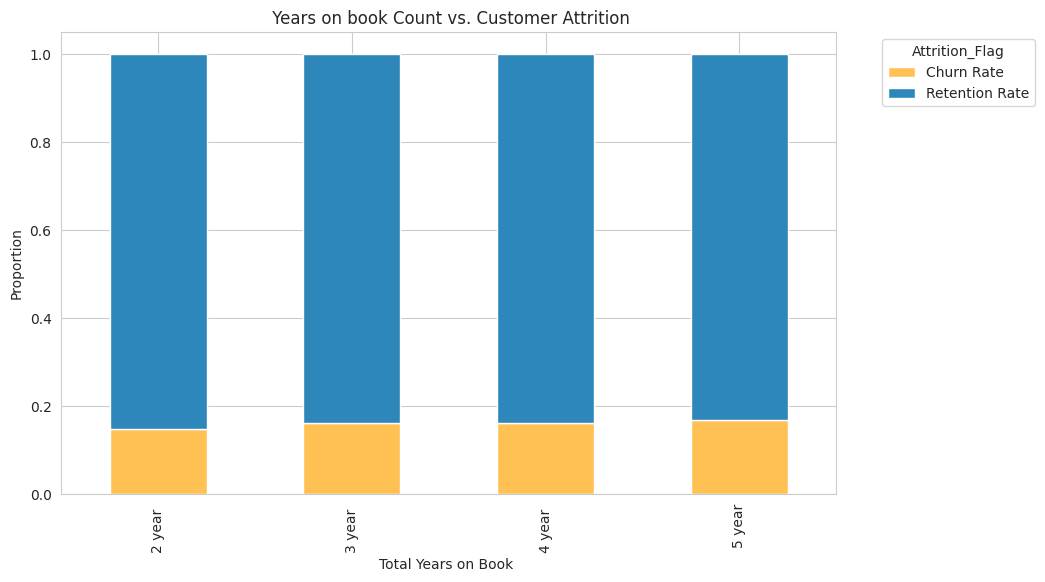

In [ ]:
# group month on book and Attrition Flag
churn['month_Group'] = pd.cut(churn['Months_on_book'], bins=[0, 24, 36, 48, 60], 
labels=['2 year ', '3 year ', '4 year ', '5 year'])
grouped6 = churn.groupby(['month_Group', 'Attrition_Flag'])['Attrition_Flag'].count().unstack()

# Calculate the percentage of customer retention and churn
grouped6["Retention Rate"] = grouped6["Existing Customer"] / (grouped6["Existing Customer"] + grouped6["Attrited Customer"])
grouped6["Churn Rate"] = grouped6["Attrited Customer"] / (grouped6["Existing Customer"] + grouped6["Attrited Customer"])

# Drawing Stacked Bars
colors = ['#FFC154','#2D87BB']
ax = grouped6[["Churn Rate","Retention Rate"]].plot(kind="bar", stacked=True, figsize=(10, 6),color=colors, mark_right = True)
ax.set_xlabel("Total Years on Book ")
ax.set_ylabel("Proportion")
ax.set_title(" Years on book Count vs. Customer Attrition")
plt.legend(title="Attrition_Flag", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

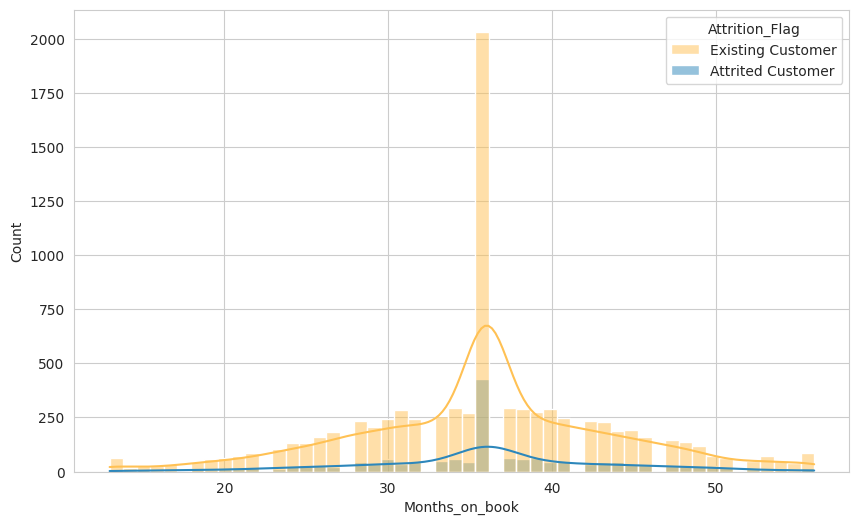

In [ ]:
plt.figure(figsize=(10,6))
colors = ['#FFC154','#2D87BB']
sns.histplot(x='Months_on_book', data=churn, kde=True, hue='Attrition_Flag',palette=sns.color_palette(colors))
 
plt.show()

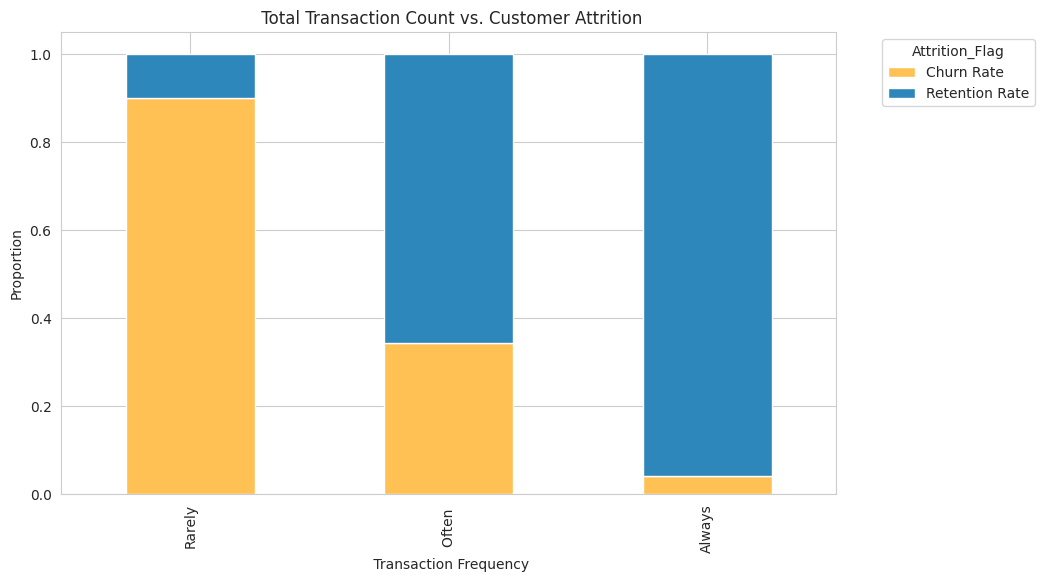

In [ ]:
# group Total Transaction Count and Attrition Flag
churn['transcount_Group'] = pd.cut(churn['Total_Trans_Ct'], bins=[0,12,60,120], 
labels=['Rarely', 'Often ', 'Always'])
group7 = churn.groupby(['transcount_Group', 'Attrition_Flag'])['Attrition_Flag'].count().unstack()

# Calculate the percentage of customer retention and churn
group7["Retention Rate"] = group7["Existing Customer"] / (group7["Existing Customer"] + group7["Attrited Customer"])
group7["Churn Rate"] = group7["Attrited Customer"] / (group7["Existing Customer"] + group7["Attrited Customer"])

# Drawing Stacked Bars
colors = ['#FFC154','#2D87BB']
ax = group7[["Churn Rate","Retention Rate"]].plot(kind="bar", stacked=True, figsize=(10, 6),color=colors, mark_right = True)
ax.set_xlabel(" Transaction Frequency")
ax.set_ylabel("Proportion")
ax.set_title(" Total Transaction Count vs. Customer Attrition")
plt.legend(title="Attrition_Flag", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Data Preprocessing

View the number of missing values in the data. 

And the result is no missing value.

In [ ]:
churn = churncopy

In [ ]:
missnumber = churn.isna().sum()
missnumber

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

Finding quantitative variables in Churn :

In [ ]:
numeric_cols = churn.select_dtypes(include=['float', 'int']).columns
churn_q = churn[numeric_cols]
churn_q

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,2,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,41,2,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,44,1,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,30,2,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


For the quantitative variables, 

we try to calculate the skewness and kurtosis.

In [ ]:
#Skewness
churn_q.skew()

Customer_Age               -0.033605
Dependent_count            -0.020826
Months_on_book             -0.106565
Total_Relationship_Count   -0.162452
Months_Inactive_12_mon      0.633061
Contacts_Count_12_mon       0.011006
Credit_Limit                1.666726
Total_Revolving_Bal        -0.148837
Avg_Open_To_Buy             1.661697
Total_Amt_Chng_Q4_Q1        1.732063
Total_Trans_Amt             2.041003
Total_Trans_Ct              0.153673
Total_Ct_Chng_Q4_Q1         2.064031
Avg_Utilization_Ratio       0.718008
dtype: float64

In [ ]:
#Kurtosis
churn_q.kurt()

Customer_Age                -0.288620
Dependent_count             -0.683017
Months_on_book               0.400100
Total_Relationship_Count    -1.006131
Months_Inactive_12_mon       1.098523
Contacts_Count_12_mon        0.000863
Credit_Limit                 1.808989
Total_Revolving_Bal         -1.145992
Avg_Open_To_Buy              1.798617
Total_Amt_Chng_Q4_Q1         9.993501
Total_Trans_Amt              3.894023
Total_Trans_Ct              -0.367163
Total_Ct_Chng_Q4_Q1         15.689293
Avg_Utilization_Ratio       -0.794972
dtype: float64

From the above values, we can speculate that

there are somesome outliers in the quantitative variable of churn, which may need to be eliminated.






In [ ]:
# Check whether there are outlier

q1 = churn_q.quantile(0.25)
q3 = churn_q.quantile(0.75)
iqr = q3 - q1
outliers = ((churn_q < (q1 - 1.5*iqr)) | (churn_q > (q3 + 1.5*iqr))).any()
print('Is there any outlier? \n\n ', outliers)

Is there any outlier? 

  Customer_Age                 True
Dependent_count             False
Months_on_book               True
Total_Relationship_Count    False
Months_Inactive_12_mon       True
Contacts_Count_12_mon        True
Credit_Limit                 True
Total_Revolving_Bal         False
Avg_Open_To_Buy              True
Total_Amt_Chng_Q4_Q1         True
Total_Trans_Amt              True
Total_Trans_Ct               True
Total_Ct_Chng_Q4_Q1          True
Avg_Utilization_Ratio       False
dtype: bool


Text(0.5, 1.0, 'Avg_Utilization_Ratio')

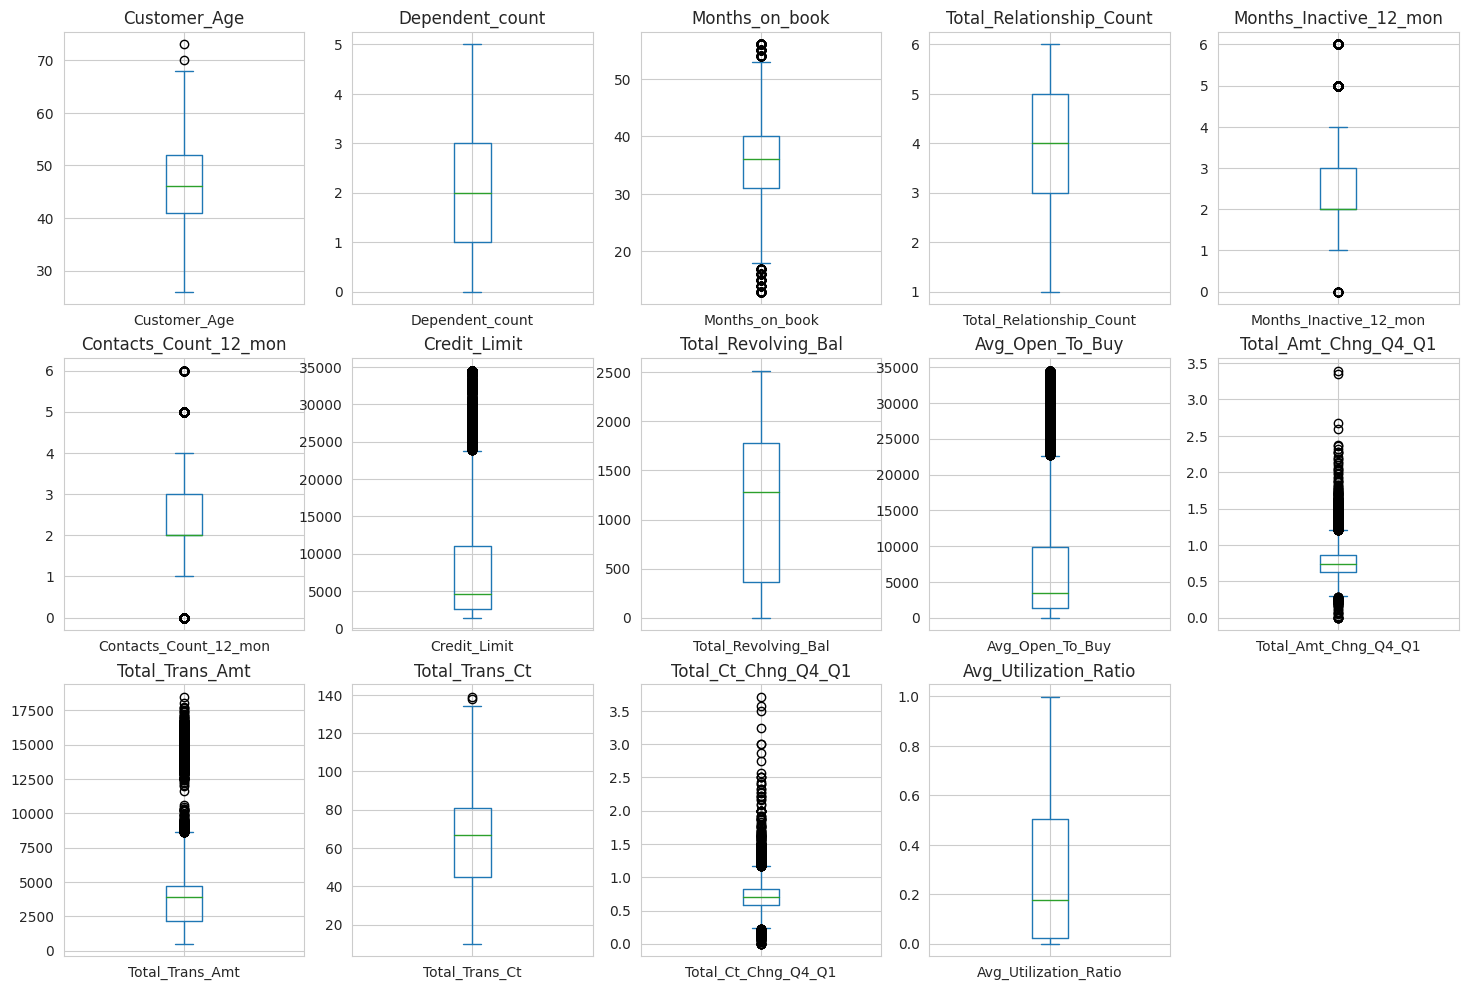

In [ ]:
plt.figure(figsize=(18,12))

plt.subplot(3,5,1)
churn_q['Customer_Age'].plot.box()
plt.title('Customer_Age')

plt.subplot(3,5,2)
churn_q['Dependent_count'].plot.box()
plt.title('Dependent_count')

plt.subplot(3,5,3)
churn_q['Months_on_book'].plot.box()
plt.title('Months_on_book')

plt.subplot(3,5,4)
churn_q['Total_Relationship_Count'].plot.box()
plt.title('Total_Relationship_Count')

plt.subplot(3,5,5)
churn_q['Months_Inactive_12_mon'].plot.box()
plt.title('Months_Inactive_12_mon')

plt.subplot(3,5,6)
churn_q['Contacts_Count_12_mon'].plot.box()
plt.title('Contacts_Count_12_mon')

plt.subplot(3,5,7)
churn_q['Credit_Limit'].plot.box()
plt.title('Credit_Limit')

plt.subplot(3,5,8)
churn_q['Total_Revolving_Bal'].plot.box()
plt.title('Total_Revolving_Bal')

plt.subplot(3,5,9)
churn_q['Avg_Open_To_Buy'].plot.box()
plt.title('Avg_Open_To_Buy')

plt.subplot(3,5,10)
churn_q['Total_Amt_Chng_Q4_Q1'].plot.box()
plt.title('Total_Amt_Chng_Q4_Q1')

plt.subplot(3,5,11)
churn_q['Total_Trans_Amt'].plot.box()
plt.title('Total_Trans_Amt')

plt.subplot(3,5,12)
churn_q['Total_Trans_Ct'].plot.box()
plt.title('Total_Trans_Ct')

plt.subplot(3,5,13)
churn_q['Total_Ct_Chng_Q4_Q1'].plot.box()
plt.title('Total_Ct_Chng_Q4_Q1')

plt.subplot(3,5,14)
churn_q['Avg_Utilization_Ratio'].plot.box()
plt.title('Avg_Utilization_Ratio')

Although these outlier refract the actual situation, they will affect our subsequent model effect. 

Therefore, we try to replace the outlier as the upper and lower limit of the standard deviation.

In [ ]:
def ReplaceOutlier(s):
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    outlier_low = (q1 - 1.5*iqr)
    outlier_up = (q3 + 1.5*iqr)
    df=s[(s > outlier_up) ]
    s[df.index]=outlier_up
    df=s[(s <outlier_low) ]
    s[df.index]=outlier_low
    return s

In [ ]:
churn_o = churn.copy()

for i in numeric_cols:
    churn_o[i] = ReplaceOutlier(churn_q[i])

<ipython-input-42-5052075a8200>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s[df.index]=outlier_up
<ipython-input-42-5052075a8200>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s[df.index]=outlier_up
<ipython-input-42-5052075a8200>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s[df.index]=outlier_low
<ipython-input-42-5052075a8200>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

Text(0.5, 1.0, 'Avg_Utilization_Ratio')

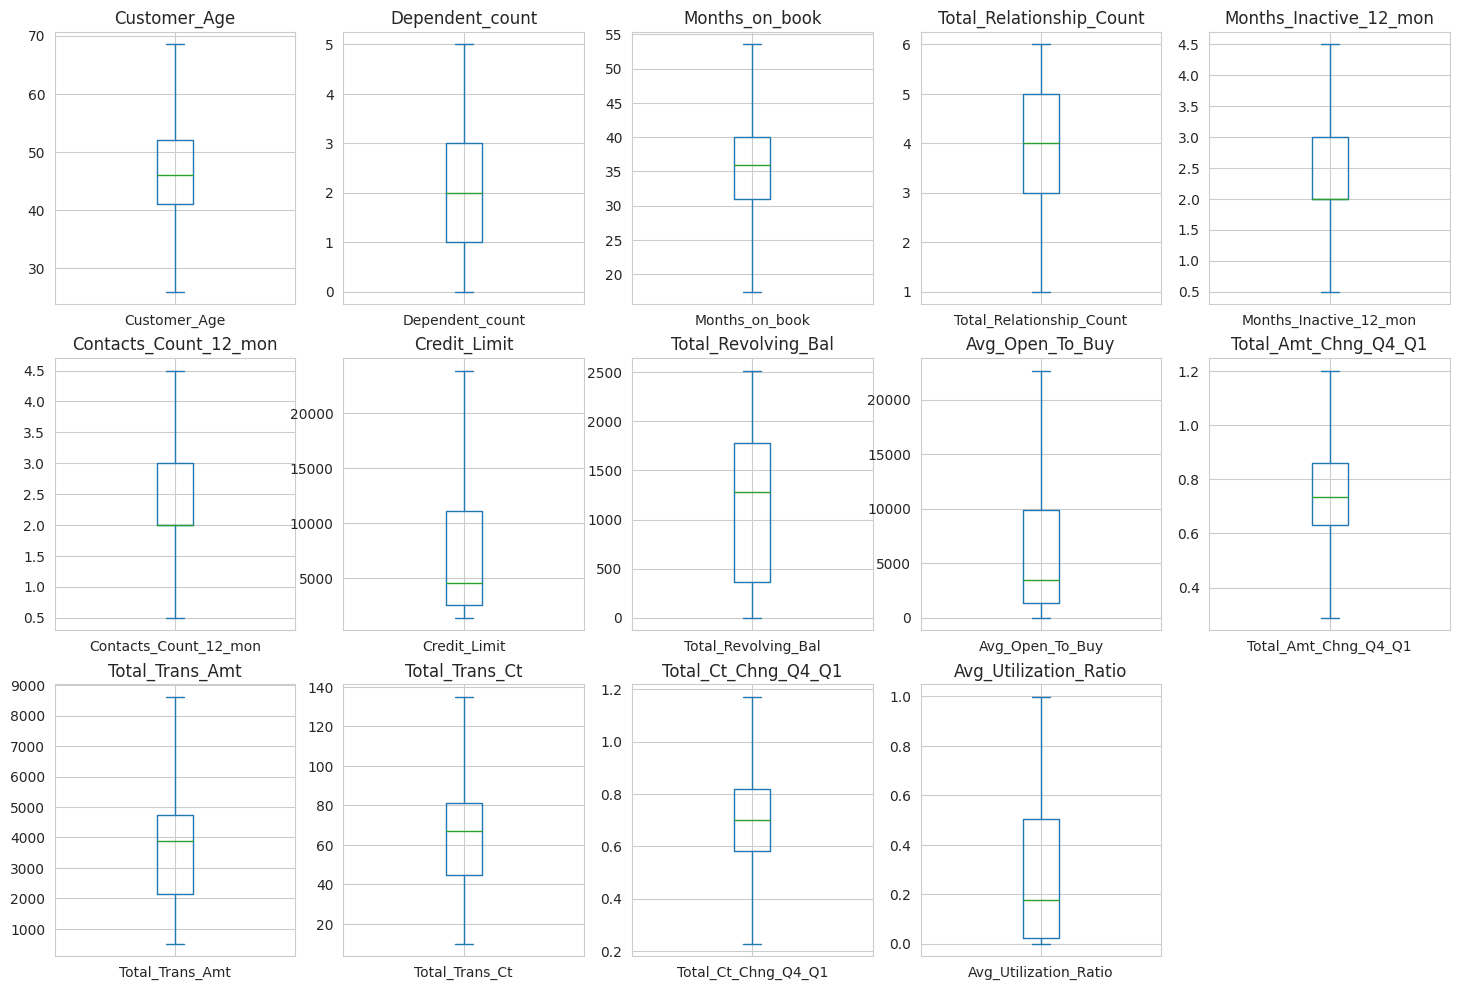

In [ ]:
plt.figure(figsize=(18,12))

plt.subplot(3,5,1)
churn_o['Customer_Age'].plot.box()
plt.title('Customer_Age')

plt.subplot(3,5,2)
churn_o['Dependent_count'].plot.box()
plt.title('Dependent_count')

plt.subplot(3,5,3)
churn_o['Months_on_book'].plot.box()
plt.title('Months_on_book')

plt.subplot(3,5,4)
churn_o['Total_Relationship_Count'].plot.box()
plt.title('Total_Relationship_Count')

plt.subplot(3,5,5)
churn_o['Months_Inactive_12_mon'].plot.box()
plt.title('Months_Inactive_12_mon')

plt.subplot(3,5,6)
churn_o['Contacts_Count_12_mon'].plot.box()
plt.title('Contacts_Count_12_mon')

plt.subplot(3,5,7)
churn_o['Credit_Limit'].plot.box()
plt.title('Credit_Limit')

plt.subplot(3,5,8)
churn_o['Total_Revolving_Bal'].plot.box()
plt.title('Total_Revolving_Bal')

plt.subplot(3,5,9)
churn_o['Avg_Open_To_Buy'].plot.box()
plt.title('Avg_Open_To_Buy')

plt.subplot(3,5,10)
churn_o['Total_Amt_Chng_Q4_Q1'].plot.box()
plt.title('Total_Amt_Chng_Q4_Q1')

plt.subplot(3,5,11)
churn_o['Total_Trans_Amt'].plot.box()
plt.title('Total_Trans_Amt')

plt.subplot(3,5,12)
churn_o['Total_Trans_Ct'].plot.box()
plt.title('Total_Trans_Ct')

plt.subplot(3,5,13)
churn_o['Total_Ct_Chng_Q4_Q1'].plot.box()
plt.title('Total_Ct_Chng_Q4_Q1')

plt.subplot(3,5,14)
churn_o['Avg_Utilization_Ratio'].plot.box()
plt.title('Avg_Utilization_Ratio')

So far, we have obtained a cleaned data, excluding missing values and outlier, for use in subsequent models.

In [ ]:
churn_o.head(5)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45.0,M,3,High School,Married,$60K - $80K,Blue,39.0,5,1.0,3.0,12691.0,777.0,11914.0,1.201,1144.0,42,1.172,0.061
1,Existing Customer,49.0,F,5,Graduate,Single,Less than $40K,Blue,44.0,6,1.0,2.0,8256.0,864.0,7392.0,1.201,1291.0,33,1.172,0.105
2,Existing Customer,51.0,M,3,Graduate,Married,$80K - $120K,Blue,36.0,4,1.0,0.5,3418.0,0.0,3418.0,1.201,1887.0,20,1.172,0.000
3,Existing Customer,40.0,F,4,High School,Unknown,Less than $40K,Blue,34.0,3,4.0,1.0,3313.0,2517.0,796.0,1.201,1171.0,20,1.172,0.760
4,Existing Customer,40.0,M,3,Uneducated,Married,$60K - $80K,Blue,21.0,5,1.0,0.5,4716.0,0.0,4716.0,1.201,816.0,28,1.172,0.000


Subsequently, we will replace some labeled variables with numerical representations

In [ ]:
print(churn_o['Attrition_Flag'].unique())
print(churn_o['Gender'].unique())
print(churn_o['Education_Level'].unique())
print(churn_o['Marital_Status'].unique())
print(churn_o['Income_Category'].unique())
print(churn_o['Card_Category'].unique())

['Existing Customer' 'Attrited Customer']
['M' 'F']
['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
['Married' 'Single' 'Unknown' 'Divorced']
['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
['Blue' 'Gold' 'Silver' 'Platinum']


In [ ]:
churn_o['Attrition_Flag'] =  churn_o['Attrition_Flag'].map({'Existing Customer':1,'Attrited Customer':0})
churn_o['Gender'] =  churn_o['Gender'].map({'M':0,'F':1})
churn_o['Education_Level'] =  churn_o['Education_Level'].map({'Uneducated':0,'College':1,'High School':2,'Graduate':3, 'Post-Graduate':4,'Doctorate':5})
churn_o['Marital_Status'] =  churn_o['Marital_Status'].map({'Single':0,'Married':1,'Divorced':2})
churn_o['Income_Category'] =  churn_o['Income_Category'].map({'Less than $40K':0,'$40K - $60K':1,'$60K - $80K':2,'$80K - $120K':3, '$120K +':4})
churn_o['Card_Category'] =  churn_o['Card_Category'].map({'Blue':0,'Gold':2,'Silver':1,'Platinum':3})

We see some unknown quantities here, after mapping they change into NaN, so we also need to clear them.

In [ ]:
churn_o = churn_o.dropna(axis=0, how='any')

In [ ]:
churn_o.head(5)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45.0,0,3,2.0,1.0,2.0,0,39.0,5,1.0,3.0,12691.0,777.0,11914.0,1.201,1144.0,42,1.172,0.061
1,1,49.0,1,5,3.0,0.0,0.0,0,44.0,6,1.0,2.0,8256.0,864.0,7392.0,1.201,1291.0,33,1.172,0.105
2,1,51.0,0,3,3.0,1.0,3.0,0,36.0,4,1.0,0.5,3418.0,0.0,3418.0,1.201,1887.0,20,1.172,0.000
4,1,40.0,0,3,0.0,1.0,2.0,0,21.0,5,1.0,0.5,4716.0,0.0,4716.0,1.201,816.0,28,1.172,0.000
5,1,44.0,0,2,3.0,1.0,1.0,0,36.0,3,1.0,2.0,4010.0,1247.0,2763.0,1.201,1088.0,24,0.846,0.311


We have successfully obtained data that can be used for subsequent model training.

# Churn Prediction

We tried using 10 models and obtained two indicators: 
accuracy and time. 

We compared these indicators and selected a better model to solve such problems in the future.

## Preparation

In [ ]:
X = churn_o.drop('Attrition_Flag', axis=1)
Y = churn_o['Attrition_Flag']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=202304)

## K-Nearest Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
start = time.time()
model.fit(X_train, Y_train)
Y_pred_model = model.predict(X_test)
score1 = metrics.accuracy_score(Y_test, Y_pred_model)
end = time.time()
t1 = end - start
print('Accuracy:', score1)
print('\nTime:', t1, 's')

Accuracy: 0.8807339449541285

Time: 0.7881152629852295 s


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
start = time.time()
model.fit(X_train, Y_train)
Y_pred_model = model.predict(X_test)
score2 = metrics.accuracy_score(Y_test, Y_pred_model)
end = time.time()
t2 = end - start
print('Accuracy:', score2)
print('\nTime:', t2, 's\n\n\n')

Accuracy: 0.8757939308398024

Time: 0.6113886833190918 s





/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
model = LDA()
start = time.time()
model.fit(X_train, Y_train)
Y_pred_model = model.predict(X_test)
score3 = metrics.accuracy_score(Y_test, Y_pred_model)
end = time.time()
t3 = end - start
print('Accuracy:', score3)
print('\nTime:', t3, 's')

Accuracy: 0.9103740296400847

Time: 0.15673232078552246 s


## QDA

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
model = QDA()
start = time.time()
model.fit(X_train, Y_train)
Y_pred_model = model.predict(X_test)
score4 = metrics.accuracy_score(Y_test, Y_pred_model)
end = time.time()
t4 = end - start
print('Accuracy:', score4)
print('\nTime:', t4, 's')

Accuracy: 0.908256880733945

Time: 0.05270648002624512 s


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
start = time.time()
model.fit(X_train, Y_train)
Y_pred_model = model.predict(X_test)
score5 = metrics.accuracy_score(Y_test, Y_pred_model)
end = time.time()
t5 = end - start
print('Accuracy:', score5)
print('\nTime:', t5, 's')

Accuracy: 0.9350741002117149

Time: 0.16881203651428223 s


## Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier()
start = time.time()
model.fit(X_train, Y_train)
Y_pred_model = model.predict(X_test)
score6 = metrics.accuracy_score(Y_test, Y_pred_model)
end = time.time()
t6 = end - start
print('Accuracy:', score6)
print('\nTime:', t6, 's')

Accuracy: 0.9604798870853917

Time: 1.2493517398834229 s


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
start = time.time()
model.fit(X_train, Y_train)
Y_pred_model = model.predict(X_test)
score7 = metrics.accuracy_score(Y_test, Y_pred_model)
end = time.time()
t7 = end - start
print('Accuracy:', score7)
print('\nTime:', t7, 's')

Accuracy: 0.9611856033874383

Time: 4.353909254074097 s


## Multinomial Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
start = time.time()
model.fit(X_train, Y_train)
Y_pred_model = model.predict(X_test)
score8 = metrics.accuracy_score(Y_test, Y_pred_model)
end = time.time()
t8 = end - start
print('Accuracy:', score8)
print('\nTime:', t8, 's')

Accuracy: 0.647847565278758

Time: 0.033182621002197266 s


## Bernoulli Naive Bayes

In [ ]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
start = time.time()
model.fit(X_train, Y_train)
Y_pred_model = model.predict(X_test)
score9 = metrics.accuracy_score(Y_test, Y_pred_model)
end = time.time()
t9 = end - start
print('Accuracy:', score9)
print('\nTime:', t9, 's')

Accuracy: 0.771347918136909

Time: 0.014844655990600586 s


## Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
start = time.time()
model.fit(X_train, Y_train)
Y_pred_model = model.predict(X_test)
score10 = metrics.accuracy_score(Y_test, Y_pred_model)
end = time.time()
t10 = end - start
print('Accuracy:', score10)
print('\nTime:', t10, 's')

Accuracy: 0.8983768525052929

Time: 0.03774452209472656 s
